<a href="https://colab.research.google.com/drive/1Ohbu1EgL06hQwXLKyAWvDEJeOnufZ0qD">Abre este Jupyter en Google Colab</a>

# Introducción a Pandas

[Pandas](https://pandas.pydata.org/about/index.html) es una librería que proporciona estructuras de datos y herramientas de análisis de datos de alto rendimiento y fáciles de usar. 
* La estructura de datos principal es el DataFrame, que puede considerarse como una tabla 2D en memoria (como una hoja de cálculo, con nombres de columna y etiquetas de fila). 
* Muchas funciones disponibles en Excel están disponibles mediante programación, como crear tablas dinámicas, calcular columnas basadas en otras columnas, trazar gráficos, etc.
* Proporciona un alto rendimiento para manipular (unir, dividir, modificar…) grandes conjuntos de datos

## Import

In [1]:
# Instalación de Pandas
!pip install pandas
!pip install pyarrow

In [2]:
import pandas as pd

## Estructuras de datos en Pandas

La librería Pandas, de manera genérica, contiene las siguientes estructuras de datos:
* **Series**: Array de una dimensión
* **DataFrame**: Se corresponde con una tabla de 2 dimensiones
* **Panel**: Similar a un diccionario de DataFrames

## Creación del objeto Series

In [3]:
# Creacion de un objeto Series
s = pd.Series([2, 4, 6, 8, 10])
print(s)

0     2
1     4
2     6
3     8
4    10
dtype: int64


In [4]:
# Creación de un objeto Series inicializándolo con un diccionario de Python
altura = {"Santiago": 187, "Pedro": 178, "Julia": 170, "Ana": 165}
s = pd.Series(altura)
print(s)

Santiago    187
Pedro       178
Julia       170
Ana         165
dtype: int64


In [5]:
# Creación de un objeto Series inicializándolo con algunos 
# de los elementos de un diccionario de Python
altura = {"Santiago": 187, "Pedro": 178, "Julia": 170, "Ana": 165}
s = pd.Series(altura, index = ["Pedro", "Julia"])
print(s)

Pedro    178
Julia    170
dtype: int64


In [6]:
# Creación de un objeto Series inicializandolo con un escalar
s = pd.Series(34, ["test1", "test2", "test3"])
print(s)

test1    34
test2    34
test3    34
dtype: int64


## Acceso a los elementos de un objeto Series

Cada elemento en un objeto Series tiene un identificador único que se denomina **_index label_**.

In [7]:
# Creación de un objeto Series
s = pd.Series([2, 4, 6, 8], index=["num1", "num2", "num3", "num4"])
print(s)

num1    2
num2    4
num3    6
num4    8
dtype: int64


In [8]:
# Accediendo al tercer elemento del objeto
s["num3"]

6

In [9]:
# Tambien se puede acceder al elemento por posición
s[2]

C:\Users\santiago\AppData\Local\Temp\ipykernel_13908\360602738.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  s[2]


6

In [10]:
# loc es la forma estándar de acceder a un elemento de un objeto Series por atributo
s.loc["num3"]

6

In [11]:
# iloc es la forma estándar de acceder a un elemento de un objeto Series por posición
s.iloc[2]

6

In [12]:
# Accediendo al segundo y tercer elemento por posición
s.iloc[2:4]

num3    6
num4    8
dtype: int64

## Operaciones aritméticas con Series

In [13]:
# Creacion de un objeto Series
s = pd.Series([2, 4, 6, 8, 10])
print(s)

0     2
1     4
2     6
3     8
4    10
dtype: int64


In [14]:
# Los objeto Series son similares y compatibles con los Arrays de Numpy
import numpy as np
# Ufunc de Numpy para sumar los elementos de un Array
np.sum(s)

30

In [15]:
# El resto de operaciones aritméticas de Numpy sobre Arrays también son posibles
# Más información al respecto en la Introducción a Numpy
s * 2

0     4
1     8
2    12
3    16
4    20
dtype: int64

## Representación gráfica de un objeto Series

In [16]:
# Creación de un objeto Series denominado Temperaturas
temperaturas = [4.4, 5.1, 6.1, 6.2, 6.1, 6.1, 5.7, 5.2, 4.7, 4.1, 3.9]
s = pd.Series(temperaturas, name="Temperaturas")
s

0     4.4
1     5.1
2     6.1
3     6.2
4     6.1
5     6.1
6     5.7
7     5.2
8     4.7
9     4.1
10    3.9
Name: Temperaturas, dtype: float64

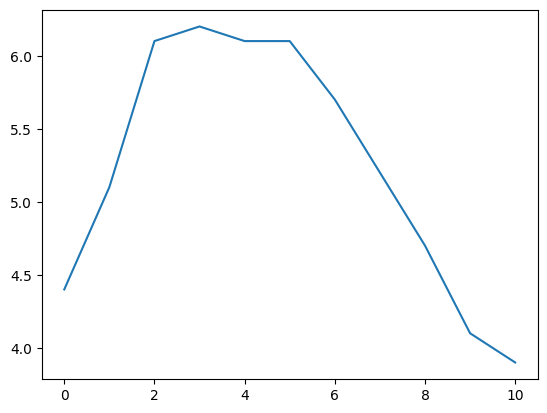

In [17]:
# Representación gráfica del objeto Series
%matplotlib inline
import matplotlib.pyplot as plt

s.plot()
plt.show()

## Creación de un objeto DataFrame

In [18]:
# Creación de un DataFrame inicializándolo con un diccionario de objetios Series
personas = {
    "peso": pd.Series([84, 90, 56, 64], ["Santiago","Pedro", "Ana", "Julia"]),
    "altura": pd.Series({"Santiago": 187, "Pedro": 178, "Julia": 170, "Ana": 165}),
    "hijos": pd.Series([2, 3], ["Pedro", "Julia"])
}

df = pd.DataFrame(personas)
df

,peso,altura,hijos
Ana,56,165,NaN
Julia,64,170,3.0
Pedro,90,178,2.0
Santiago,84,187,NaN


Puede forzarse al DataFrame a que presente unas columnas determinadas y en un orden determinado

In [19]:
# Creación de un DataFrame inicializándolo con algunos elementos de un diccionario
# de objetos Series
personas = {
    "peso": pd.Series([84, 90, 56, 64], ["Santiago","Pedro", "Ana", "Julia"]),
    "altura": pd.Series({"Santiago": 187, "Pedro": 178, "Julia": 170, "Ana": 165}),
    "hijos": pd.Series([2, 3], ["Pedro", "Julia"])
}

df = pd.DataFrame(
        personas,
        columns = ["altura", "peso"],
        index = ["Ana", "Julia", "Santiago"])
df

,altura,peso
Ana,165,56
Julia,170,64
Santiago,187,84


In [20]:
# Creación de un DataFrame inicializándolo con una lista de listas de Python
# Importante: Deben especificarse las columnas e indices por separado
valores = [
    [185, 4, 76],
    [170, 0, 65],
    [190, 1, 89]
]

df = pd.DataFrame(
        valores,
        columns = ["altura", "hijos", "peso"],
        index = ["Pedro", "Ana", "Juan"])
df

,altura,hijos,peso
Pedro,185,4,76
Ana,170,0,65
Juan,190,1,89


In [21]:
# Creación de un DataFrame inicializándolo con un diccionario de Python
personas = {
    "altura": {"Santiago": 187, "Pedro": 178, "Julia": 170, "Ana": 165}, 
    "peso": {"Santiago": 87, "Pedro": 78, "Julia": 70, "Ana": 65}}

df = pd.DataFrame(personas)
df

,altura,peso
Santiago,187,87
Pedro,178,78
Julia,170,70
Ana,165,65


## Acceso a los elementos de un DataFrame

In [22]:
# Creación de un DataFrame inicializándolo con un diccionario de objetios Series
personas = {
    "peso": pd.Series([84, 90, 56, 64], ["Santiago","Pedro", "Ana", "Julia"]),
    "altura": pd.Series({"Santiago": 187, "Pedro": 178, "Julia": 170, "Ana": 165}),
    "hijos": pd.Series([2, 3], ["Pedro", "Julia"])
}

df = pd.DataFrame(personas)
df

,peso,altura,hijos
Ana,56,165,NaN
Julia,64,170,3.0
Pedro,90,178,2.0
Santiago,84,187,NaN


### Acceso a los elementos de las columnas del DataFrame

In [23]:
df["peso"]

Ana         56
Julia       64
Pedro       90
Santiago    84
Name: peso, dtype: int64

In [24]:
df[["peso", "altura"]]

,peso,altura
Ana,56,165
Julia,64,170
Pedro,90,178
Santiago,84,187


In [25]:
# Pueden combinarse los metodos anteriores con expresiones booleanas
df["peso"] > 80

Ana         False
Julia       False
Pedro        True
Santiago     True
Name: peso, dtype: bool

In [26]:
# Pueden combinarse los metodos anteriores con expresiones booleanas
df[df["peso"] > 80]

,peso,altura,hijos
Pedro,90,178,2.0
Santiago,84,187,NaN


### Acceso a los elementos de las filas del DataFrame

In [27]:
# Mostrar el DataFrame
df

,peso,altura,hijos
Ana,56,165,NaN
Julia,64,170,3.0
Pedro,90,178,2.0
Santiago,84,187,NaN


In [28]:
df.loc["Pedro"]

peso       90.0
altura    178.0
hijos       2.0
Name: Pedro, dtype: float64

In [29]:
df.iloc[2]

peso       90.0
altura    178.0
hijos       2.0
Name: Pedro, dtype: float64

In [30]:
df.iloc[1:3]

,peso,altura,hijos
Julia,64,170,3.0
Pedro,90,178,2.0


### Consulta avanzada de los elementos de un DataFrame

In [31]:
# Mostrar el DataFrame
df

,peso,altura,hijos
Ana,56,165,NaN
Julia,64,170,3.0
Pedro,90,178,2.0
Santiago,84,187,NaN


In [32]:
df.query("altura >= 170 and peso > 60")

,peso,altura,hijos
Julia,64,170,3.0
Pedro,90,178,2.0
Santiago,84,187,NaN


## Copiar un DataFrame

In [33]:
# Creación de un DataFrame inicializándolo con un diccionario de objetios Series
personas = {
    "peso": pd.Series([84, 90, 56, 64], ["Santiago","Pedro", "Ana", "Julia"]),
    "altura": pd.Series({"Santiago": 187, "Pedro": 178, "Julia": 170, "Ana": 165}),
    "hijos": pd.Series([2, 3], ["Pedro", "Julia"])
}

df = pd.DataFrame(personas)
df

,peso,altura,hijos
Ana,56,165,NaN
Julia,64,170,3.0
Pedro,90,178,2.0
Santiago,84,187,NaN


In [34]:
# Copia del DataFrame df en df_copy
# Importante: Al modificar un elemento de df_copy no se modifica df
df_copy = df.copy()

## Modificación de un DataFrame

In [35]:
# Creación de un DataFrame inicializándolo con un diccionario de objetios Series
personas = {
    "peso": pd.Series([84, 90, 56, 64], ["Santiago","Pedro", "Ana", "Julia"]),
    "altura": pd.Series({"Santiago": 187, "Pedro": 178, "Julia": 170, "Ana": 165}),
    "hijos": pd.Series([2, 3], ["Pedro", "Julia"])
}

df = pd.DataFrame(personas)
df

,peso,altura,hijos
Ana,56,165,NaN
Julia,64,170,3.0
Pedro,90,178,2.0
Santiago,84,187,NaN


In [36]:
# Añadir una nueva columna al DataFrame
df["cumpleaños"] = [1990, 1987, 1980, 1994]
df

,peso,altura,hijos,cumpleaños
Ana,56,165,NaN,1990
Julia,64,170,3.0,1987
Pedro,90,178,2.0,1980
Santiago,84,187,NaN,1994


In [37]:
# Añadir una nueva columna calculada al DataFrame
df["años"] = 2020 - df["cumpleaños"]
df

,peso,altura,hijos,cumpleaños,años
Ana,56,165,NaN,1990,30
Julia,64,170,3.0,1987,33
Pedro,90,178,2.0,1980,40
Santiago,84,187,NaN,1994,26


In [38]:
# Añadir una nueva columna creando un DataFrame nuevo
df_mod = df.assign(mascotas = [1, 3, 0, 0])
df_mod

,peso,altura,hijos,cumpleaños,años,mascotas
Ana,56,165,NaN,1990,30,1
Julia,64,170,3.0,1987,33,3
Pedro,90,178,2.0,1980,40,0
Santiago,84,187,NaN,1994,26,0


In [39]:
df

,peso,altura,hijos,cumpleaños,años
Ana,56,165,NaN,1990,30
Julia,64,170,3.0,1987,33
Pedro,90,178,2.0,1980,40
Santiago,84,187,NaN,1994,26


In [40]:
# Eliminar una columna existente del DataFrame
del df["peso"]
df

,altura,hijos,cumpleaños,años
Ana,165,NaN,1990,30
Julia,170,3.0,1987,33
Pedro,178,2.0,1980,40
Santiago,187,NaN,1994,26


In [41]:
# Eliminar una columna existente devolviendo una copia del DataFrame resultante
df_mod = df.drop(["hijos"], axis=1)
df_mod

,altura,cumpleaños,años
Ana,165,1990,30
Julia,170,1987,33
Pedro,178,1980,40
Santiago,187,1994,26


In [42]:
df

,altura,hijos,cumpleaños,años
Ana,165,NaN,1990,30
Julia,170,3.0,1987,33
Pedro,178,2.0,1980,40
Santiago,187,NaN,1994,26


## Evaluación de expresiones sobre un DataFrame

In [43]:
# Creación de un DataFrame inicializándolo con un diccionario de objetios Series
personas = {
    "peso": pd.Series([84, 90, 56, 64], ["Santiago","Pedro", "Ana", "Julia"]),
    "altura": pd.Series({"Santiago": 187, "Pedro": 178, "Julia": 170, "Ana": 165}),
    "hijos": pd.Series([2, 3], ["Pedro", "Julia"])
}

df = pd.DataFrame(personas)
df

,peso,altura,hijos
Ana,56,165,NaN
Julia,64,170,3.0
Pedro,90,178,2.0
Santiago,84,187,NaN


In [44]:
# Evaluar una función sobre una columna del DataFrame
df.eval("altura / 2")

Ana         82.5
Julia       85.0
Pedro       89.0
Santiago    93.5
Name: altura, dtype: float64

In [45]:
# Asignar el valor resultante como una nueva columna
df.eval("media_altura = altura / 2", inplace=True)
df

,peso,altura,hijos,media_altura
Ana,56,165,NaN,82.5
Julia,64,170,3.0,85.0
Pedro,90,178,2.0,89.0
Santiago,84,187,NaN,93.5


In [46]:
# Evaluar una función utilizando una variable local
max_altura = 180
df.eval("altura > @max_altura")

Ana         False
Julia       False
Pedro       False
Santiago     True
Name: altura, dtype: bool

In [47]:
# Aplicar una función externa a una columna del DataFrame
def func(x):
    return x + 2

df["peso"].apply(func)

Ana         58
Julia       66
Pedro       92
Santiago    86
Name: peso, dtype: int64

In [48]:
df

,peso,altura,hijos,media_altura
Ana,56,165,NaN,82.5
Julia,64,170,3.0,85.0
Pedro,90,178,2.0,89.0
Santiago,84,187,NaN,93.5


## Guardar y Cargar el DataFrame

In [49]:
# Creación de un DataFrame inicializándolo con un diccionario de objetios Series
personas = {
    "peso": pd.Series([84, 90, 56, 64], ["Santiago","Pedro", "Ana", "Julia"]),
    "altura": pd.Series({"Santiago": 187, "Pedro": 178, "Julia": 170, "Ana": 165}),
    "hijos": pd.Series([2, 3], ["Pedro", "Julia"])
}

df = pd.DataFrame(personas)
df

,peso,altura,hijos
Ana,56,165,NaN
Julia,64,170,3.0
Pedro,90,178,2.0
Santiago,84,187,NaN


In [50]:
# Guardar el DataFrame como CSV, HTML y JSON
df.to_csv("df_personas.csv")
df.to_html("df_personas.html")
df.to_json("df_personas.json")

In [51]:
# Cargar el DataFrame en Jupyter
df2 = pd.read_csv("df_personas.csv")

In [52]:
df2

,Unnamed: 0,peso,altura,hijos
0,Ana,56,165,NaN
1,Julia,64,170,3.0
2,Pedro,90,178,2.0
3,Santiago,84,187,NaN


In [53]:
# Cargar el DataFrame con la primera columna correctamente asignada
df2 = pd.read_csv("df_personas.csv", index_col=0)
df2

,peso,altura,hijos
Ana,56,165,NaN
Julia,64,170,3.0
Pedro,90,178,2.0
Santiago,84,187,NaN


ANÁLISIS DE CAÍDA LIBRE
    tiempo_s  distancia_m  distancia_cm  velocidad_m/s  aceleracion_m/s2
0        0.0    -0.007691     -0.769124            NaN               NaN
1        0.1     0.001106      0.110645       0.087977               NaN
2        0.2     0.259375     25.937459       2.582681         24.947043
3        0.3     0.454130     45.413015       1.947556         -6.351257
4        0.4     0.827468     82.746782       3.733377         17.858211
5        0.5     1.224970    122.497000       3.975022          2.416451
6        0.6     1.758936    175.893643       5.339664         13.646424
7        0.7     2.447563    244.756265       6.886262         15.465980
8        0.8     3.101074    310.107358       6.535109         -3.511530
9        0.9     3.981926    398.192557       8.808520         22.734107
10       1.0     4.858040    485.803952       8.761140         -0.473804

Gravedad experimental: 9.41 m/s²
Error: 4.11%

Estadísticas de aceleración:
count     9.000000
mean

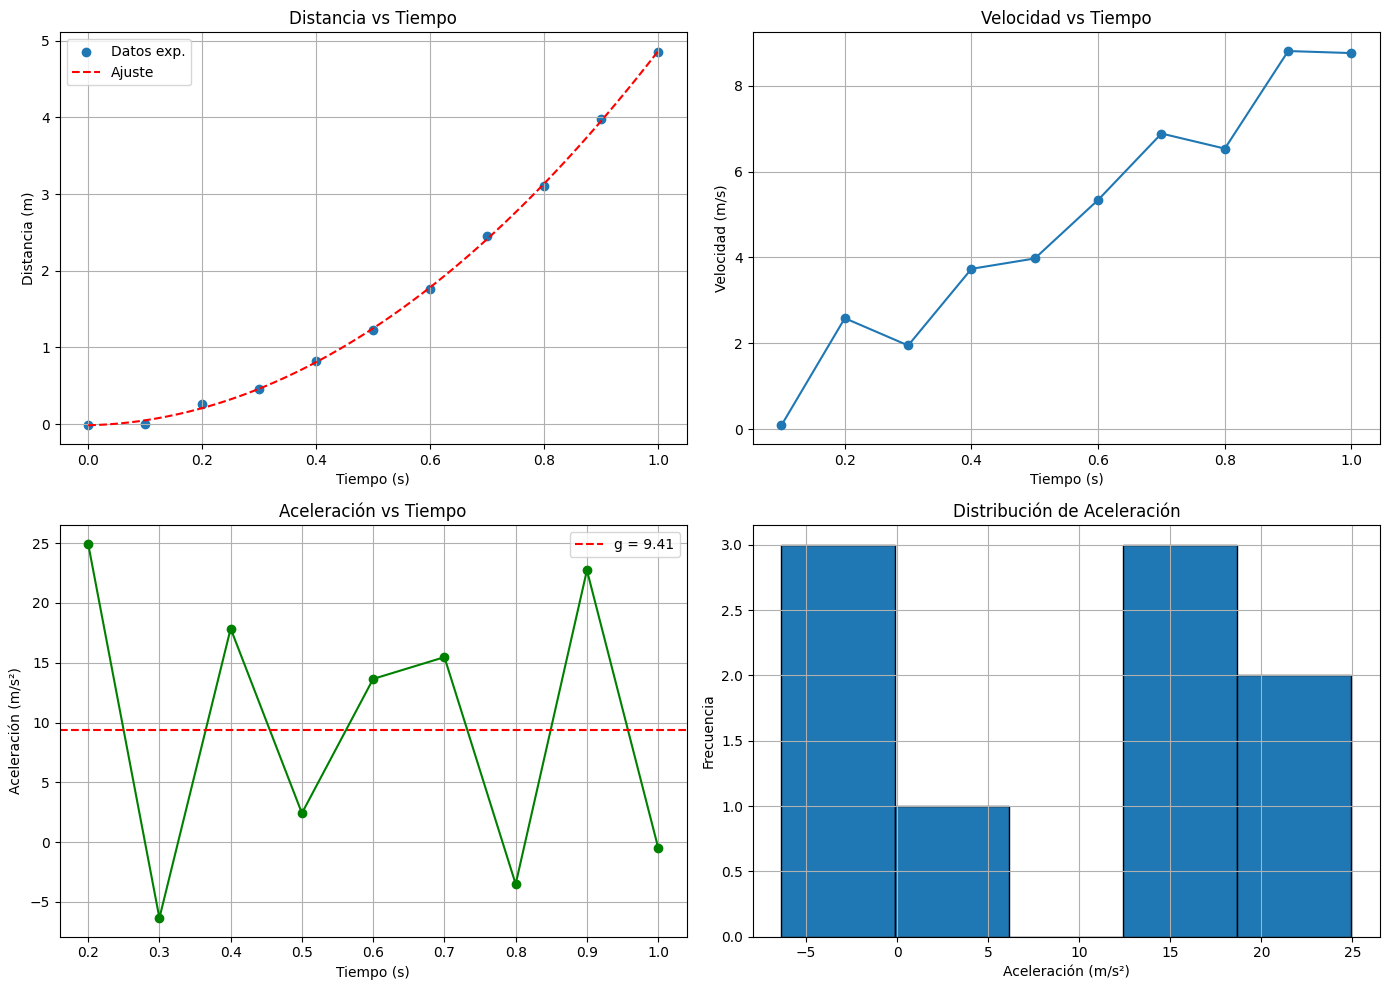

,tiempo_s,distancia_m,distancia_cm,velocidad_m/s,aceleracion_m/s2
0,0.0,-0.007691,-0.769124,NaN,NaN
1,0.1,0.001106,0.110645,0.087977,NaN
2,0.2,0.259375,25.937459,2.582681,24.947043
3,0.3,0.454130,45.413015,1.947556,-6.351257
4,0.4,0.827468,82.746782,3.733377,17.858211
5,0.5,1.224970,122.497000,3.975022,2.416451
6,0.6,1.758936,175.893643,5.339664,13.646424
7,0.7,2.447563,244.756265,6.886262,15.465980
8,0.8,3.101074,310.107358,6.535109,-3.511530
9,0.9,3.981926,398.192557,8.808520,22.734107


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def caida_libre_experimental():
    """
    Analiza datos experimentales de caída libre y calcula 'g'
    """
    # Simular datos experimentales con error
    tiempos = np.array([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
    g_real = 9.81
    # Distancia con pequeño error experimental
    distancias = 0.5 * g_real * tiempos**2 + np.random.normal(0, 0.05, len(tiempos))
    
    # Crear DataFrame
    df = pd.DataFrame({
        'tiempo_s': tiempos,
        'distancia_m': distancias,
        'distancia_cm': distancias * 100
    })
    
    # Calcular velocidad instantánea (aproximada)
    df['velocidad_m/s'] = df['distancia_m'].diff() / df['tiempo_s'].diff()
    
    # Calcular aceleración
    df['aceleracion_m/s2'] = df['velocidad_m/s'].diff() / df['tiempo_s'].diff()
    
    # Ajuste polinomial para calcular g
    coef = np.polyfit(df['tiempo_s'], df['distancia_m'], 2)
    g_experimental = 2 * coef[0]
    
    print("=" * 60)
    print("ANÁLISIS DE CAÍDA LIBRE")
    print("=" * 60)
    print(df.to_string())
    print(f"\nGravedad experimental: {g_experimental:.2f} m/s²")
    print(f"Error: {abs(g_experimental - g_real)/g_real * 100:.2f}%")
    
    # Estadísticas
    print("\nEstadísticas de aceleración:")
    print(df['aceleracion_m/s2'].describe())
    
    # Visualización
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    
    axes[0, 0].scatter(df['tiempo_s'], df['distancia_m'], label='Datos exp.')
    t_fit = np.linspace(0, 1, 100)
    axes[0, 0].plot(t_fit, np.polyval(coef, t_fit), 'r--', label='Ajuste')
    axes[0, 0].set_xlabel('Tiempo (s)')
    axes[0, 0].set_ylabel('Distancia (m)')
    axes[0, 0].set_title('Distancia vs Tiempo')
    axes[0, 0].legend()
    axes[0, 0].grid(True)
    
    axes[0, 1].plot(df['tiempo_s'], df['velocidad_m/s'], 'o-')
    axes[0, 1].set_xlabel('Tiempo (s)')
    axes[0, 1].set_ylabel('Velocidad (m/s)')
    axes[0, 1].set_title('Velocidad vs Tiempo')
    axes[0, 1].grid(True)
    
    axes[1, 0].plot(df['tiempo_s'], df['aceleracion_m/s2'], 'o-', color='green')
    axes[1, 0].axhline(y=g_experimental, color='r', linestyle='--', label=f'g = {g_experimental:.2f}')
    axes[1, 0].set_xlabel('Tiempo (s)')
    axes[1, 0].set_ylabel('Aceleración (m/s²)')
    axes[1, 0].set_title('Aceleración vs Tiempo')
    axes[1, 0].legend()
    axes[1, 0].grid(True)
    
    axes[1, 1].hist(df['aceleracion_m/s2'].dropna(), bins=5, edgecolor='black')
    axes[1, 1].set_xlabel('Aceleración (m/s²)')
    axes[1, 1].set_ylabel('Frecuencia')
    axes[1, 1].set_title('Distribución de Aceleración')
    axes[1, 1].grid(True)
    
    plt.tight_layout()
    plt.show()
    
    return df
caida_libre_experimental()


ANÁLISIS DE COLISIONES
   experimento  p_inicial  p_final  diferencia_momento_%  energia_perdida_% tipo_colision
0            1       1.00    1.000              0.000000          13.500000    Inelástica
1            2       1.25    1.248              0.160000          13.699840    Inelástica
2            3       1.50    1.499              0.066667          13.382889    Inelástica
3            4       0.75    0.747              0.400000          13.597333    Inelástica
4            5       1.10    1.099              0.090909          13.340083    Inelástica
5            6       1.40    1.400              0.000000          13.500000    Inelástica
6            7       0.90    0.872              3.111111          19.920988    Inelástica
7            8       1.15    1.147              0.260870          13.564083    Inelástica
8            9       1.30    1.299              0.076923          13.364793    Inelástica
9           10       1.05    1.048              0.190476          13.737868 

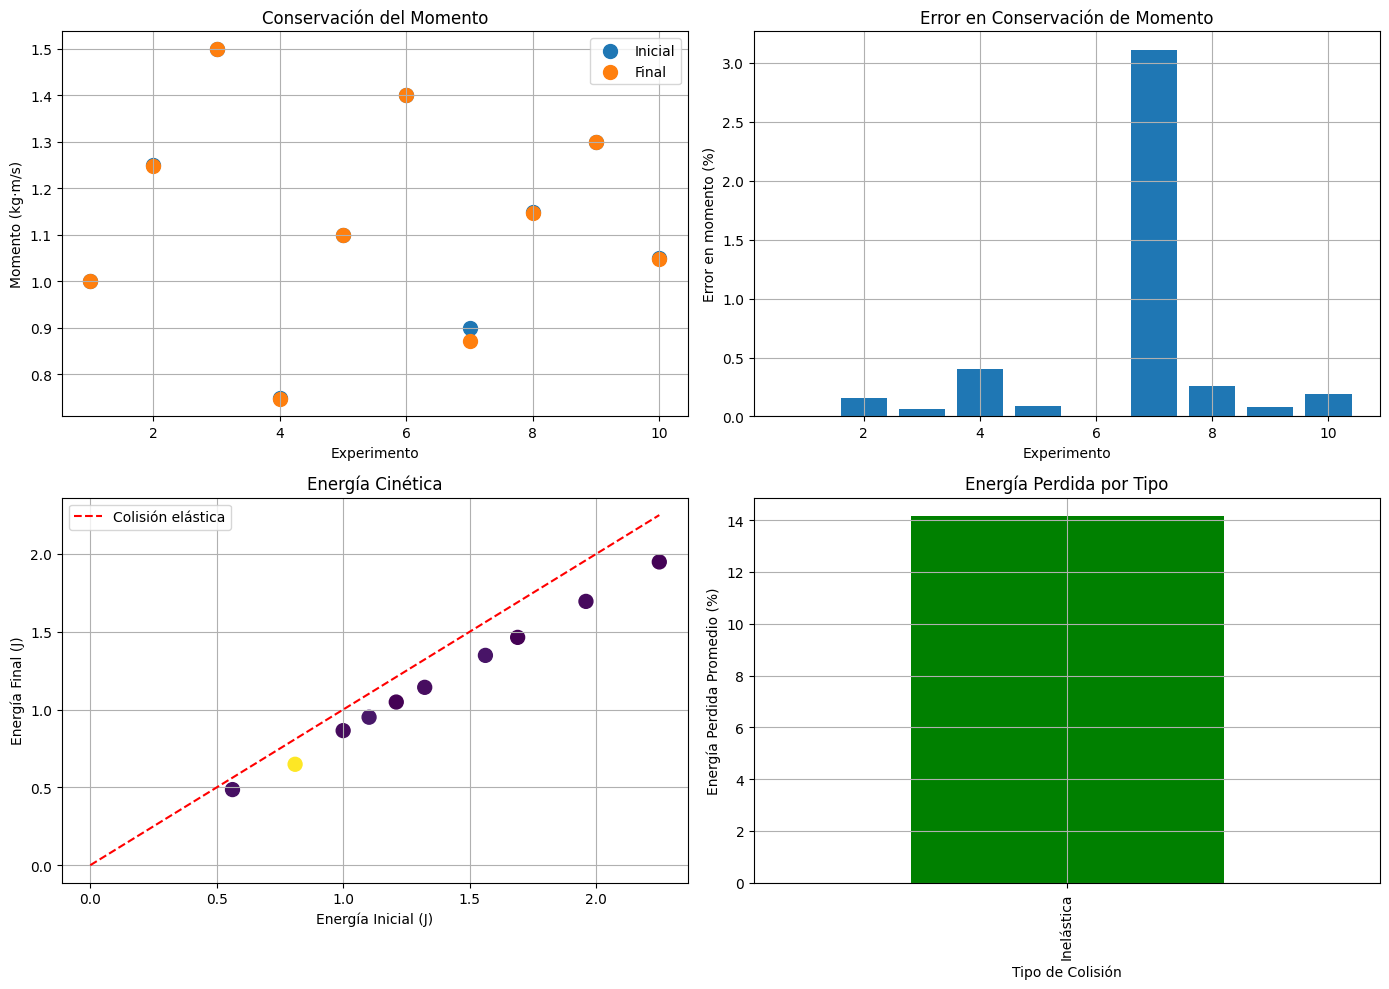

,experimento,m1_kg,m2_kg,v1_inicial_m/s,v2_inicial_m/s,v1_final_m/s,v2_final_m/s,p_inicial,p_final,diferencia_momento_%,Ec_inicial,Ec_final,energia_perdida_%,tipo_colision
0,1,0.5,0.3,2.0,0.0,0.65,2.25,1.00,1.000,0.000000,1.0000,0.865000,13.500000,Inelástica
1,2,0.5,0.3,2.5,0.0,0.81,2.81,1.25,1.248,0.160000,1.5625,1.348440,13.699840,Inelástica
2,3,0.5,0.3,3.0,0.0,0.97,3.38,1.50,1.499,0.066667,2.2500,1.948885,13.382889,Inelástica
3,4,0.5,0.3,1.5,0.0,0.48,1.69,0.75,0.747,0.400000,0.5625,0.486015,13.597333,Inelástica
4,5,0.5,0.3,2.2,0.0,0.71,2.48,1.10,1.099,0.090909,1.2100,1.048585,13.340083,Inelástica
5,6,0.5,0.3,2.8,0.0,0.91,3.15,1.40,1.400,0.000000,1.9600,1.695400,13.500000,Inelástica
6,7,0.5,0.3,1.8,0.0,0.58,1.94,0.90,0.872,3.111111,0.8100,0.648640,19.920988,Inelástica
7,8,0.5,0.3,2.3,0.0,0.74,2.59,1.15,1.147,0.260870,1.3225,1.143115,13.564083,Inelástica
8,9,0.5,0.3,2.6,0.0,0.84,2.93,1.30,1.299,0.076923,1.6900,1.464135,13.364793,Inelástica
9,10,0.5,0.3,2.1,0.0,0.68,2.36,1.05,1.048,0.190476,1.1025,0.951040,13.737868,Inelástica


In [2]:
def analisis_colisiones():
    """
    Analiza conservación de momento en colisiones
    """
    # Datos de múltiples experimentos de colisión
    datos = {
        'experimento': range(1, 11),
        'm1_kg': [0.5] * 10,
        'm2_kg': [0.3] * 10,
        'v1_inicial_m/s': [2.0, 2.5, 3.0, 1.5, 2.2, 2.8, 1.8, 2.3, 2.6, 2.1],
        'v2_inicial_m/s': [0.0] * 10,
        'v1_final_m/s': [0.65, 0.81, 0.97, 0.48, 0.71, 0.91, 0.58, 0.74, 0.84, 0.68],
        'v2_final_m/s': [2.25, 2.81, 3.38, 1.69, 2.48, 3.15, 1.94, 2.59, 2.93, 2.36]
    }
    
    df = pd.DataFrame(datos)
    
    # Calcular momento inicial y final
    df['p_inicial'] = df['m1_kg'] * df['v1_inicial_m/s'] + df['m2_kg'] * df['v2_inicial_m/s']
    df['p_final'] = df['m1_kg'] * df['v1_final_m/s'] + df['m2_kg'] * df['v2_final_m/s']
    df['diferencia_momento_%'] = abs(df['p_final'] - df['p_inicial']) / df['p_inicial'] * 100
    
    # Calcular energía cinética
    df['Ec_inicial'] = 0.5 * df['m1_kg'] * df['v1_inicial_m/s']**2
    df['Ec_final'] = 0.5 * (df['m1_kg'] * df['v1_final_m/s']**2 + df['m2_kg'] * df['v2_final_m/s']**2)
    df['energia_perdida_%'] = (df['Ec_inicial'] - df['Ec_final']) / df['Ec_inicial'] * 100
    
    # Clasificar tipo de colisión
    df['tipo_colision'] = df['energia_perdida_%'].apply(
        lambda x: 'Elástica' if x < 5 else 'Inelástica'
    )
    
    print("\n" + "=" * 80)
    print("ANÁLISIS DE COLISIONES")
    print("=" * 80)
    print(df[['experimento', 'p_inicial', 'p_final', 'diferencia_momento_%', 
              'energia_perdida_%', 'tipo_colision']].to_string())
    
    # Estadísticas agrupadas
    print("\nEstadísticas por tipo de colisión:")
    print(df.groupby('tipo_colision').agg({
        'diferencia_momento_%': ['mean', 'std'],
        'energia_perdida_%': ['mean', 'std']
    }))
    
    # Visualización
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    
    axes[0, 0].scatter(df['experimento'], df['p_inicial'], label='Inicial', s=100)
    axes[0, 0].scatter(df['experimento'], df['p_final'], label='Final', s=100)
    axes[0, 0].set_xlabel('Experimento')
    axes[0, 0].set_ylabel('Momento (kg·m/s)')
    axes[0, 0].set_title('Conservación del Momento')
    axes[0, 0].legend()
    axes[0, 0].grid(True)
    
    axes[0, 1].bar(df['experimento'], df['diferencia_momento_%'])
    axes[0, 1].set_xlabel('Experimento')
    axes[0, 1].set_ylabel('Error en momento (%)')
    axes[0, 1].set_title('Error en Conservación de Momento')
    axes[0, 1].grid(True)
    
    axes[1, 0].scatter(df['Ec_inicial'], df['Ec_final'], c=df['energia_perdida_%'], 
                       cmap='viridis', s=100)
    axes[1, 0].plot([0, df['Ec_inicial'].max()], [0, df['Ec_inicial'].max()], 
                    'r--', label='Colisión elástica')
    axes[1, 0].set_xlabel('Energía Inicial (J)')
    axes[1, 0].set_ylabel('Energía Final (J)')
    axes[1, 0].set_title('Energía Cinética')
    axes[1, 0].legend()
    axes[1, 0].grid(True)
    
    df.groupby('tipo_colision')['energia_perdida_%'].mean().plot(kind='bar', 
                                                                   ax=axes[1, 1], 
                                                                   color=['green', 'orange'])
    axes[1, 1].set_xlabel('Tipo de Colisión')
    axes[1, 1].set_ylabel('Energía Perdida Promedio (%)')
    axes[1, 1].set_title('Energía Perdida por Tipo')
    axes[1, 1].grid(True)
    
    plt.tight_layout()
    plt.show()
    
    return df
analisis_colisiones()


ANÁLISIS LEY DE OHM
   voltaje_V  corriente_R1_100Ω_A  potencia_R1_100Ω_W  corriente_R2_220Ω_A  potencia_R2_220Ω_W  corriente_R3_470Ω_A  potencia_R3_470Ω_W  corriente_R4_1kΩ_A  potencia_R4_1kΩ_W
0        0.0             0.000000            0.000000             0.000000            0.000000             0.000000            0.000000            0.000000           0.000000
1        1.0             0.010304            0.010304             0.004588            0.004588             0.002102            0.002102            0.000988           0.000988
2        2.0             0.020213            0.040425             0.009084            0.018168             0.004314            0.008629            0.002014           0.004029
3        3.0             0.029080            0.087239             0.013828            0.041483             0.006413            0.019238            0.003118           0.009354
4        4.0             0.039228            0.156911             0.018421            0.073683          

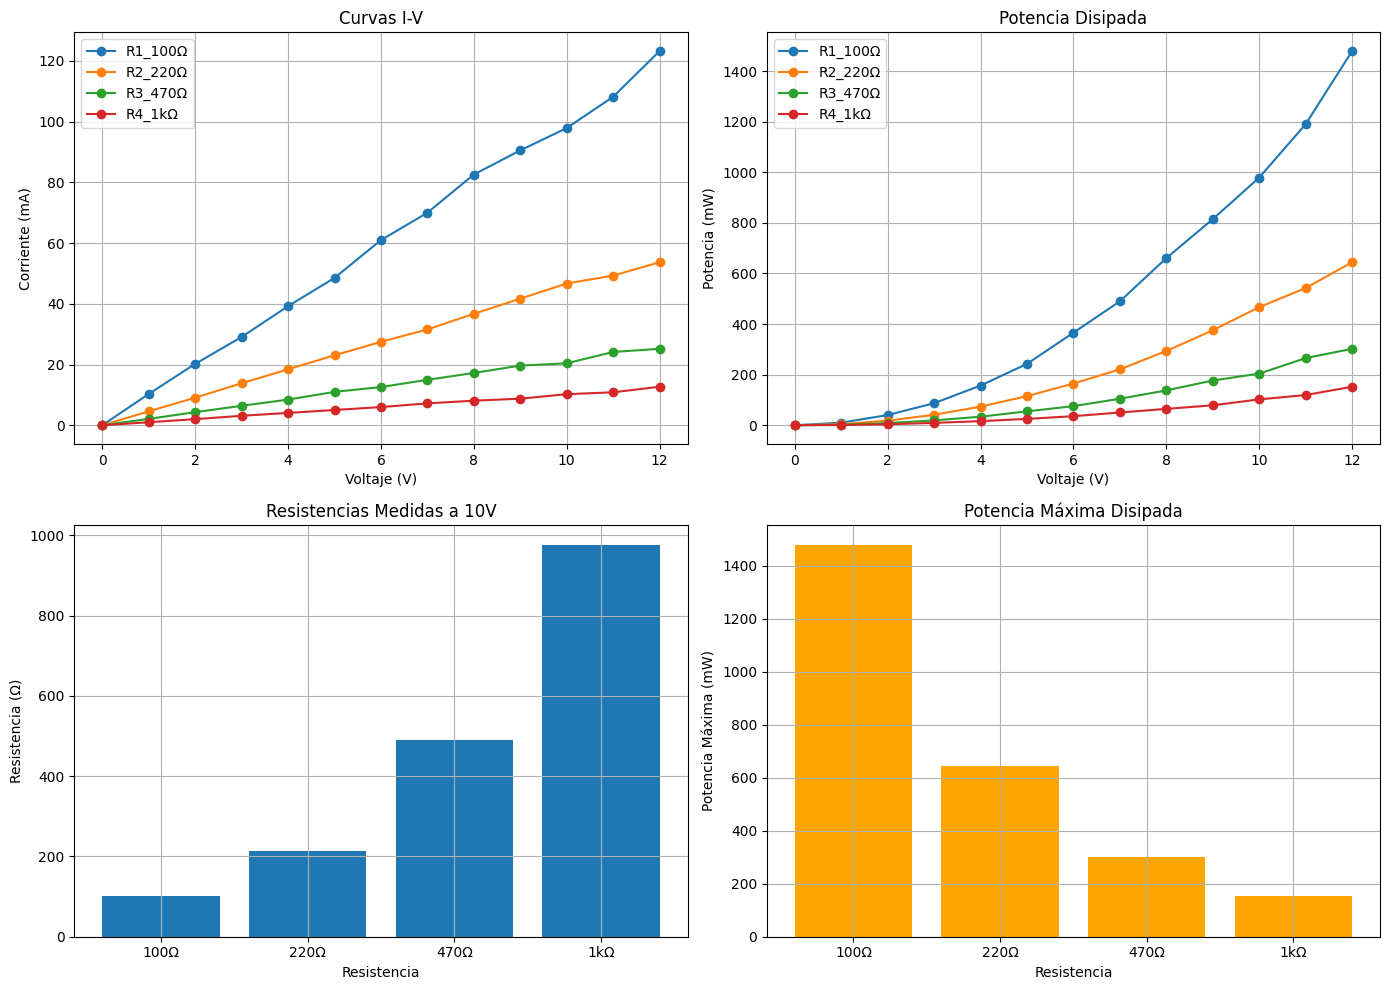

,voltaje_V,corriente_R1_100Ω_A,potencia_R1_100Ω_W,corriente_R2_220Ω_A,potencia_R2_220Ω_W,corriente_R3_470Ω_A,potencia_R3_470Ω_W,corriente_R4_1kΩ_A,potencia_R4_1kΩ_W
0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1.0,0.010304,0.010304,0.004588,0.004588,0.002102,0.002102,0.000988,0.000988
2,2.0,0.020213,0.040425,0.009084,0.018168,0.004314,0.008629,0.002014,0.004029
3,3.0,0.029080,0.087239,0.013828,0.041483,0.006413,0.019238,0.003118,0.009354
4,4.0,0.039228,0.156911,0.018421,0.073683,0.008455,0.033819,0.004061,0.016245
5,5.0,0.048532,0.242659,0.023042,0.115212,0.011005,0.055023,0.005030,0.025152
6,6.0,0.060985,0.365907,0.027485,0.164911,0.012586,0.075516,0.005992,0.035950
7,7.0,0.070000,0.490001,0.031556,0.220891,0.014973,0.104813,0.007206,0.050441
8,8.0,0.082593,0.660741,0.036704,0.293633,0.017228,0.137823,0.008092,0.064732
9,9.0,0.090536,0.814822,0.041708,0.375369,0.019654,0.176890,0.008758,0.078825


In [3]:

def analisis_ley_ohm():
    """
    Analiza datos experimentales de la Ley de Ohm
    """
    # Datos de múltiples resistencias
    voltajes = np.linspace(0, 12, 13)
    
    resistencias = {
        'R1_100Ω': 100,
        'R2_220Ω': 220,
        'R3_470Ω': 470,
        'R4_1kΩ': 1000
    }
    
    datos = {'voltaje_V': voltajes}
    
    for nombre, R in resistencias.items():
        # Corriente con pequeño error experimental
        I_teorica = voltajes / R
        I_experimental = I_teorica + np.random.normal(0, I_teorica * 0.02)
        datos[f'corriente_{nombre}_A'] = I_experimental
        datos[f'potencia_{nombre}_W'] = voltajes * I_experimental
    
    df = pd.DataFrame(datos)
    
    print("\n" + "=" * 80)
    print("ANÁLISIS LEY DE OHM")
    print("=" * 80)
    print(df.head(10).to_string())
    
    # Calcular resistencias experimentales
    print("\nResistencias calculadas (promedio):")
    for nombre in resistencias.keys():
        corriente_col = f'corriente_{nombre}_A'
        R_exp = (df['voltaje_V'] / df[corriente_col]).mean()
        R_teorica = resistencias[nombre]
        error = abs(R_exp - R_teorica) / R_teorica * 100
        print(f"{nombre}: {R_exp:.2f} Ω (Error: {error:.2f}%)")
    
    # Visualización
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    
    for nombre in resistencias.keys():
        corriente_col = f'corriente_{nombre}_A'
        axes[0, 0].plot(df['voltaje_V'], df[corriente_col] * 1000, 'o-', label=nombre)
    axes[0, 0].set_xlabel('Voltaje (V)')
    axes[0, 0].set_ylabel('Corriente (mA)')
    axes[0, 0].set_title('Curvas I-V')
    axes[0, 0].legend()
    axes[0, 0].grid(True)
    
    for nombre in resistencias.keys():
        potencia_col = f'potencia_{nombre}_W'
        axes[0, 1].plot(df['voltaje_V'], df[potencia_col] * 1000, 'o-', label=nombre)
    axes[0, 1].set_xlabel('Voltaje (V)')
    axes[0, 1].set_ylabel('Potencia (mW)')
    axes[0, 1].set_title('Potencia Disipada')
    axes[0, 1].legend()
    axes[0, 1].grid(True)
    
    # Resistencia vs corriente a 10V
    resistencias_exp = []
    nombres_cortos = []
    for nombre in resistencias.keys():
        corriente_col = f'corriente_{nombre}_A'
        R_exp = df.loc[df['voltaje_V'] == 10, 'voltaje_V'].values[0] / \
                df.loc[df['voltaje_V'] == 10, corriente_col].values[0]
        resistencias_exp.append(R_exp)
        nombres_cortos.append(nombre.split('_')[1])
    
    axes[1, 0].bar(nombres_cortos, resistencias_exp)
    axes[1, 0].set_xlabel('Resistencia')
    axes[1, 0].set_ylabel('Resistencia (Ω)')
    axes[1, 0].set_title('Resistencias Medidas a 10V')
    axes[1, 0].grid(True)
    
    # Comparación potencia máxima
    potencias_max = [df[f'potencia_{nombre}_W'].max() * 1000 for nombre in resistencias.keys()]
    axes[1, 1].bar(nombres_cortos, potencias_max, color='orange')
    axes[1, 1].set_xlabel('Resistencia')
    axes[1, 1].set_ylabel('Potencia Máxima (mW)')
    axes[1, 1].set_title('Potencia Máxima Disipada')
    axes[1, 1].grid(True)
    
    plt.tight_layout()
    plt.show()
    
    return df
analisis_ley_ohm()


ANÁLISIS CARGA/DESCARGA CAPACITOR
Constante de tiempo τ = 1.0000 s

Tiempo para 63.2% de carga: 1.0000 s
Tiempo para 95% de carga: 3.0000 s

Estadísticas por proceso:
         voltaje_V                    corriente_mA                      \
               min      max      mean          min       max      mean   
proceso                                                                  
Carga    -0.116152  9.02440  7.176246     0.006064  0.900000  0.181567   
Descarga -0.051584  8.97983  1.820035    -0.900000 -0.006064 -0.181567   

             energia_J            
                   min       max  
proceso                           
Carga     6.745639e-07  0.004072  
Descarga  2.696656e-09  0.004032  


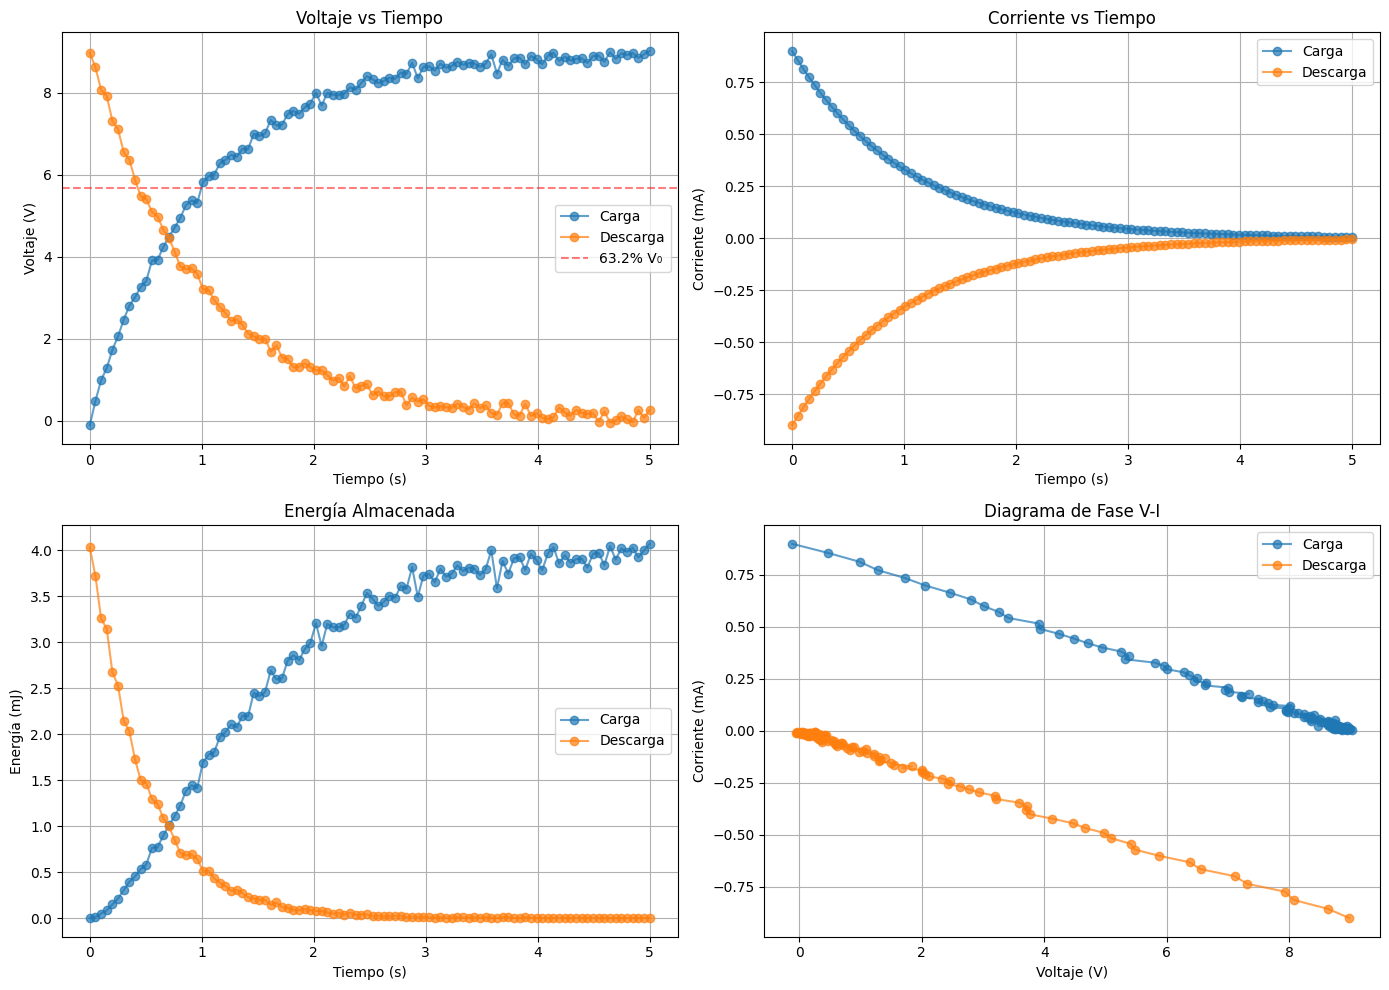

,tiempo_s,voltaje_V,corriente_mA,proceso,energia_J
0,0.000000,-0.116152,0.900000,Carga,6.745639e-07
1,0.050505,0.474364,0.855674,Carga,1.125105e-05
2,0.101010,0.984092,0.813532,Carga,4.842181e-05
3,0.151515,1.280736,0.773464,Carga,8.201426e-05
4,0.202020,1.724695,0.735371,Carga,1.487286e-04
...,...,...,...,...,...
195,4.797980,0.024891,-0.007422,Descarga,3.097765e-08
196,4.848485,-0.041787,-0.007056,Descarga,8.730646e-08
197,4.898990,0.251102,-0.006709,Descarga,3.152606e-06
198,4.949495,0.054698,-0.006378,Descarga,1.495962e-07


In [4]:

def analisis_carga_capacitor():
    """
    Analiza la carga y descarga de un capacitor
    """
    # Parámetros del circuito
    R = 10000  # Ω
    C = 100e-6  # F
    V0 = 9  # V
    tau = R * C
    
    # Datos de carga
    t_carga = np.linspace(0, 5*tau, 100)
    V_carga = V0 * (1 - np.exp(-t_carga/tau)) + np.random.normal(0, 0.1, len(t_carga))
    I_carga = (V0/R) * np.exp(-t_carga/tau) * 1000  # mA
    
    # Datos de descarga
    t_descarga = np.linspace(0, 5*tau, 100)
    V_descarga = V0 * np.exp(-t_descarga/tau) + np.random.normal(0, 0.1, len(t_descarga))
    I_descarga = -(V0/R) * np.exp(-t_descarga/tau) * 1000  # mA
    
    # Crear DataFrames
    df_carga = pd.DataFrame({
        'tiempo_s': t_carga,
        'voltaje_V': V_carga,
        'corriente_mA': I_carga,
        'proceso': 'Carga'
    })
    
    df_descarga = pd.DataFrame({
        'tiempo_s': t_descarga,
        'voltaje_V': V_descarga,
        'corriente_mA': I_descarga,
        'proceso': 'Descarga'
    })
    
    df = pd.concat([df_carga, df_descarga], ignore_index=True)
    
    # Calcular energía almacenada
    df['energia_J'] = 0.5 * C * df['voltaje_V']**2
    
    print("\n" + "=" * 80)
    print("ANÁLISIS CARGA/DESCARGA CAPACITOR")
    print("=" * 80)
    print(f"Constante de tiempo τ = {tau:.4f} s")
    print(f"\nTiempo para 63.2% de carga: {tau:.4f} s")
    print(f"Tiempo para 95% de carga: {3*tau:.4f} s")
    
    print("\nEstadísticas por proceso:")
    print(df.groupby('proceso').agg({
        'voltaje_V': ['min', 'max', 'mean'],
        'corriente_mA': ['min', 'max', 'mean'],
        'energia_J': ['min', 'max']
    }))
    
    # Visualización
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    
    for proceso in ['Carga', 'Descarga']:
        data = df[df['proceso'] == proceso]
        axes[0, 0].plot(data['tiempo_s'], data['voltaje_V'], 'o-', 
                       label=proceso, alpha=0.7)
    axes[0, 0].axhline(y=V0*0.632, color='r', linestyle='--', alpha=0.5, label='63.2% V₀')
    axes[0, 0].set_xlabel('Tiempo (s)')
    axes[0, 0].set_ylabel('Voltaje (V)')
    axes[0, 0].set_title('Voltaje vs Tiempo')
    axes[0, 0].legend()
    axes[0, 0].grid(True)
    
    for proceso in ['Carga', 'Descarga']:
        data = df[df['proceso'] == proceso]
        axes[0, 1].plot(data['tiempo_s'], data['corriente_mA'], 'o-', 
                       label=proceso, alpha=0.7)
    axes[0, 1].set_xlabel('Tiempo (s)')
    axes[0, 1].set_ylabel('Corriente (mA)')
    axes[0, 1].set_title('Corriente vs Tiempo')
    axes[0, 1].legend()
    axes[0, 1].grid(True)
    
    for proceso in ['Carga', 'Descarga']:
        data = df[df['proceso'] == proceso]
        axes[1, 0].plot(data['tiempo_s'], data['energia_J']*1000, 'o-', 
                       label=proceso, alpha=0.7)
    axes[1, 0].set_xlabel('Tiempo (s)')
    axes[1, 0].set_ylabel('Energía (mJ)')
    axes[1, 0].set_title('Energía Almacenada')
    axes[1, 0].legend()
    axes[1, 0].grid(True)
    
    # Gráfico de fase V-I
    for proceso in ['Carga', 'Descarga']:
        data = df[df['proceso'] == proceso]
        axes[1, 1].plot(data['voltaje_V'], data['corriente_mA'], 'o-', 
                       label=proceso, alpha=0.7)
    axes[1, 1].set_xlabel('Voltaje (V)')
    axes[1, 1].set_ylabel('Corriente (mA)')
    axes[1, 1].set_title('Diagrama de Fase V-I')
    axes[1, 1].legend()
    axes[1, 1].grid(True)
    
    plt.tight_layout()
    plt.show()
    
    return df
analisis_carga_capacitor()